In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定

plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams['font.size'] = 8 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 12 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(12,12),dpi=100)

df = pd.read_csv("cp.csv", names=["x", "y", "cp", "cnt"])


<Figure size 1200x1200 with 0 Axes>

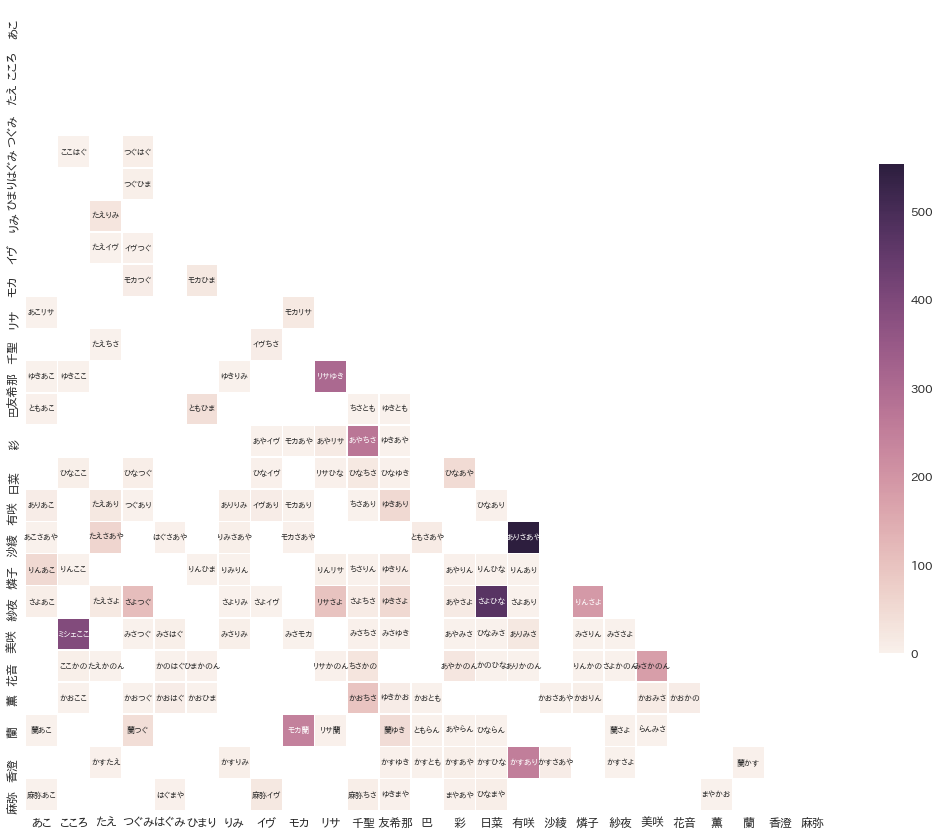

In [82]:
corr_mat = df.pivot_table("cnt", index="x", columns="y")
cp_mat = df.pivot(values="cp", index="x", columns="y")

arrange = df.x.drop_duplicates

# corr_mat = np.tril(corr_mat, k=-1)
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.where(corr_mat == 0)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, annot=cp_mat, fmt = '',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# ax = sns.heatmap(corr_mat)
ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("")

plt.savefig('25c2.png')